# Multiple Linear Regression 

## Bike Sharing Assignment

### Problem Statement 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Business Objective

The company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 1) Which variables are significant in predicting the demand for shared bikes.
 2) How well those variables describe the bike demands
 
 The goal is to model the demand for shared bikes with the available independent variables which will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1 : Reading and Understanding the Data

In [1]:
#Importing all the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the data from 'day.csv' file usinf pandas

raw_data=pd.read_csv('day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# General overivew of the meta data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The data consists of 730 entries with total 16 columns.

###  1.1 Missing Values 

 As we can see there are no null values in the data set since all the columns have 730 entries. Lets verify the same.

In [4]:
# Verifying for any Missing data
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# No of Unique values in a column
raw_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Since the data has pretty good unique values , there is no need to drop an predictor

In [6]:
#Looking at the descritive statistics of the data
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.2 Cleaning data

Dropping columns like __instant__ as it is just a row instance and __dteday__ as its a repeatative columns for _yr_,_mnth_ and _weekday_

In [7]:
raw_data.drop(['instant','dteday'],inplace=True,axis=1)

Dropping columns like __casual__ and __registred__ because the target column _cnt_ is a summation of these two columns

In [8]:
raw_data.drop(['casual','registered'],inplace=True,axis=1)

Assigning names to the following columns to better understand and represent the data

season - 1: spring, 2: Summer, 3: fall, 4: winter
<br>
weathersit - 1: Clear, 2: Mist, 3:Light Snow, 4: Heavy Rain
<br>
mnth - 1: Jan,2: Feb,3: Mar,4: Apr,5: May,6: Jun,
                  7: Jul,8: Aug,9: Sept,10: Oct,11: Nov,12: Dec
<br>
weekday - 0: Sun,1: Mon,2: Tue,3: Wed,4: Thu,5: Fri,6: Sat

In [9]:
raw_data['season']=raw_data[['season']].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
raw_data['weathersit']=raw_data[['weathersit']].apply(lambda x: x.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"}))
raw_data['mnth'] = raw_data[['mnth']].replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

raw_data['weekday'] = raw_data[['weekday']].replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})




## Step 2 : EDA


#### Continous Variables with the target variable 


___Plotting paiplots___

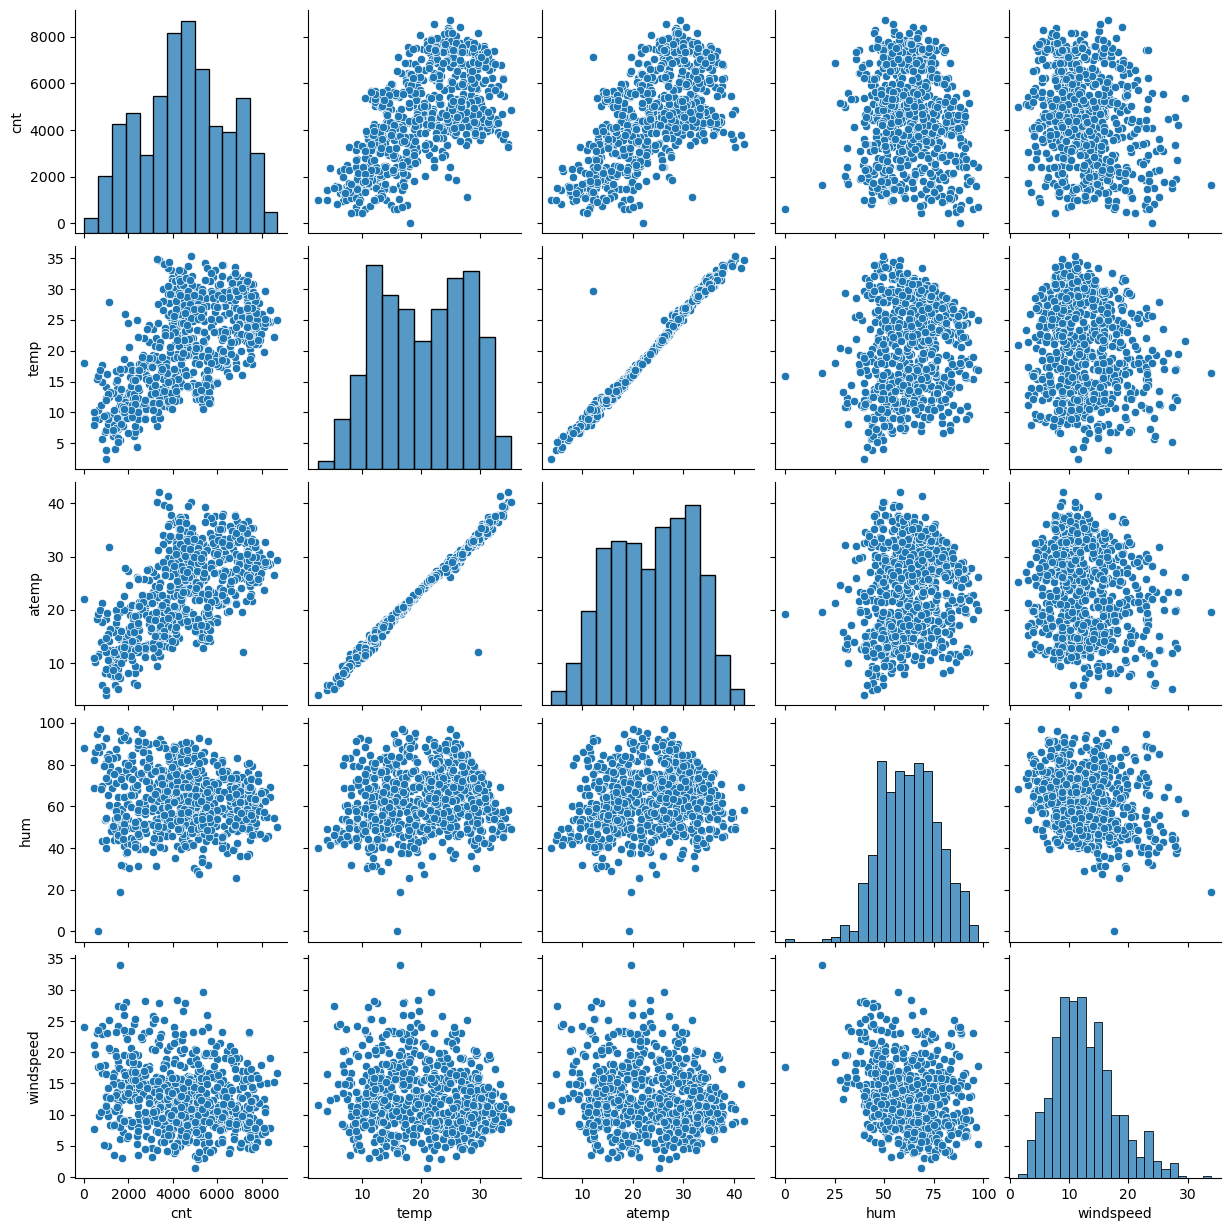

In [10]:
sns.pairplot(raw_data[['cnt','temp','atemp','hum','windspeed']])

__Based on the plots above, we can inference that :__
<br>
1) Target variable ___cnt___ is having a linear relationship with ___temp___ and __atemp__
2) Variables ___temp___ and ___atemp___ are highly correlated 


#### Categorical Variables with the target variable 


___Plotting Box plots___

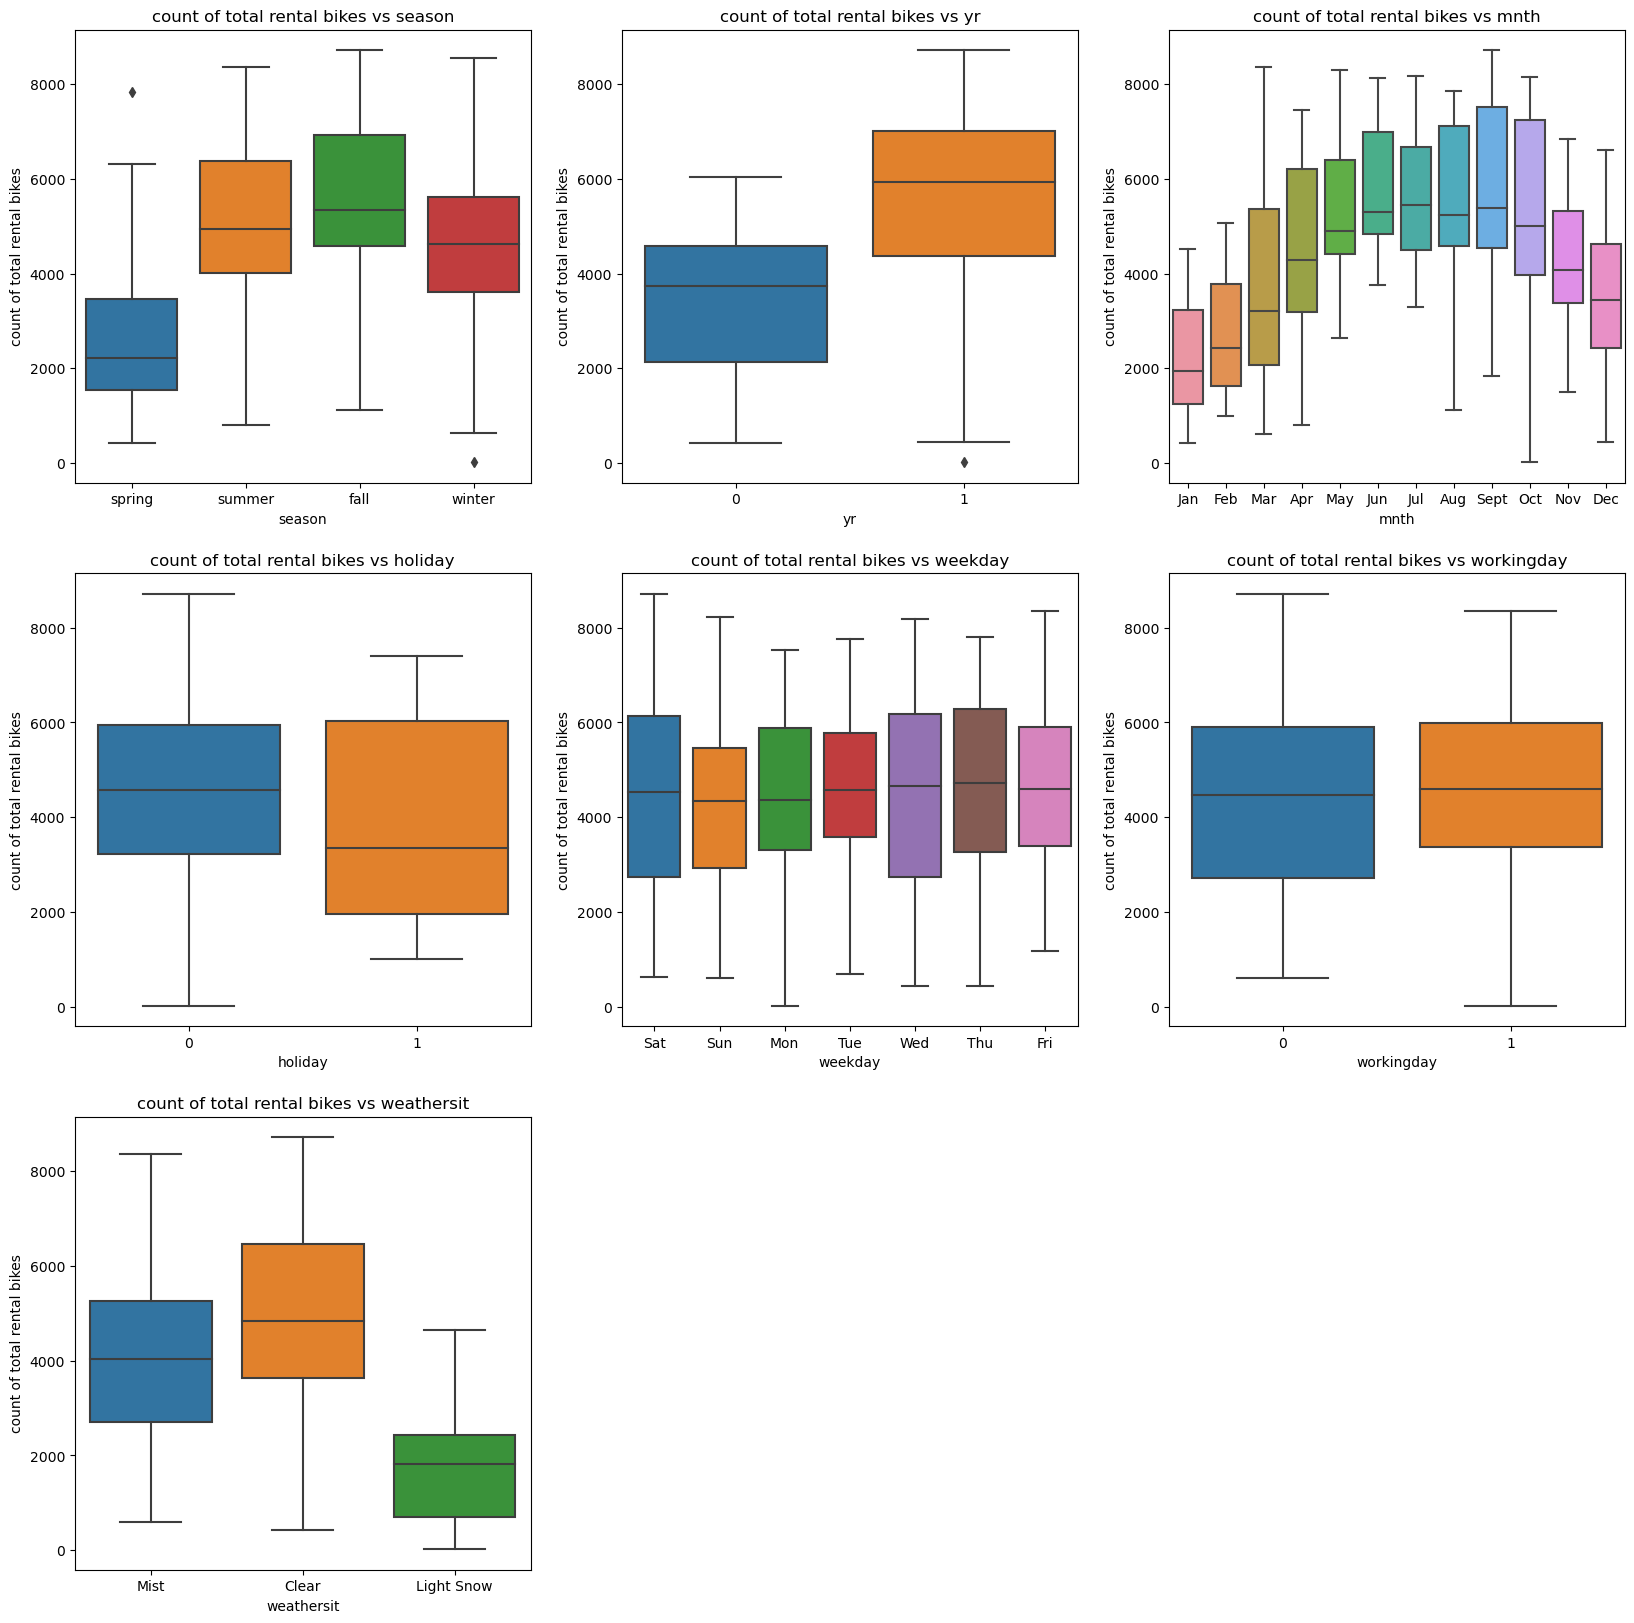

In [11]:
cat_list=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cat_index=0
cols=3
rows=int(len(cat_list)/cols)+1

plt.figure(figsize=(20, 20))
for row_num in range(1,rows+1):
    for col_num in range(1,cols+1):
        if(cat_index>=len(cat_list)):
            break
        plt.subplot(rows,cols,cat_index+1)
        sns.boxplot(y=raw_data['cnt'],x=raw_data[cat_list[cat_index]])
        plt.ylabel("count of total rental bikes")
        plt.title(f"count of total rental bikes vs {cat_list[cat_index]}")
        cat_index=cat_index+1
        
    if row_num==row_num+1:
        break
   
       

__Based on the plots above, we can inference that :__
<br>
1. During ___fall___ season, the demand for rental bikes is highest.
2. ___2019___ seems to be way ahead than ___2018___ in terms of rental bikes demand.
3. There is a constant increase in the bike demand till mid-year ,___September___ being the highest of them all and after that the demand decreases.
4. When there is a ___holiday___,there is a drop in the mean demand.
5. From the plot, it looks like that the demand remains same irrespective of ___weekday___ or a ___working day___.
6. Demand is highest when the weather situation is ___Clear___.

___Plotting Heatmap___

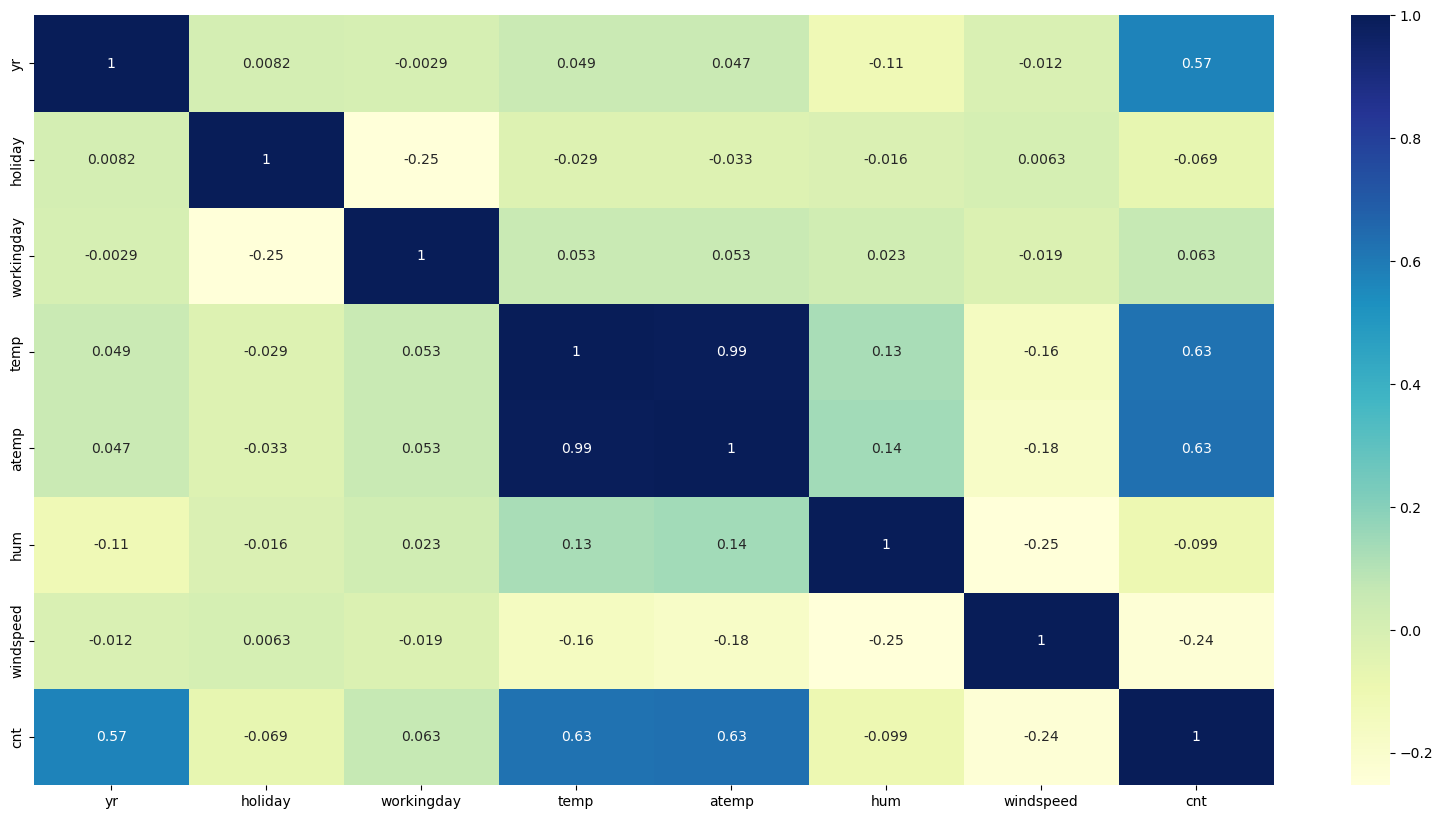

In [12]:
# Plotting heatmap of correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20,10))
sns.heatmap(raw_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

__Based on the plots above, we can inference that :__
<br>
1. ___temp___ and ___atemp___ are highly correlated
2. ___cnt___ is correlated with ___yr___,___temp___ and ___atemp___

## Step 3 : Data Preparation 

Since all the binary categorical variables are handled on their own , lets prepare the data for the categorical variables that have nultilevel like __season__,__weathersit__,__mnth__,__weekday__ 

### 3.1 - Dummy Variables

In [13]:
#Creating dummy variables
season_status=pd.get_dummies(raw_data['season'],drop_first=True)
weathersit_status=pd.get_dummies(raw_data['weathersit'],drop_first=True)
mnth_status=pd.get_dummies(raw_data['mnth'],drop_first=True)
weekday_status=pd.get_dummies(raw_data['weekday'],drop_first=True)



In [14]:
# Concatening the dummy variables with our main data
bike=pd.concat([raw_data,season_status,mnth_status,weekday_status,weathersit_status],axis=1)


In [15]:
# Dropping variables after converting it into dummy variables
bike.drop(['season','weathersit','mnth','weekday'],inplace=True,axis=1)



In [16]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### 3.2 -  Splitting the Data into Training and Testing Sets

In [17]:
np.random.seed(0)  # Adding this so that we can have the same split everytime we run the file
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=0)

In [18]:
# Checking the shape of training and testing set
print(bike.shape)
print(df_train.shape)
print(df_test.shape)


(730, 30)
(510, 30)
(220, 30)


### 3.3 - Rescaling the feature

Normalizing the columns using MinMaxScaler function

In [19]:
scaler=MinMaxScaler()

var_list=['temp','atemp','hum','windspeed','cnt']

df_train[var_list]=scaler.fit_transform(df_train[var_list])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,0,1,...,0,0,0,1,0,0,0,0,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,1,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,0,1,...,0,0,0,1,0,0,0,0,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,0,...,0,0,0,0,0,0,0,1,0,0
502,1,0,1,0.611185,0.621666,0.374709,0.236721,0.876323,0,1,...,0,0,0,0,0,0,0,0,0,0


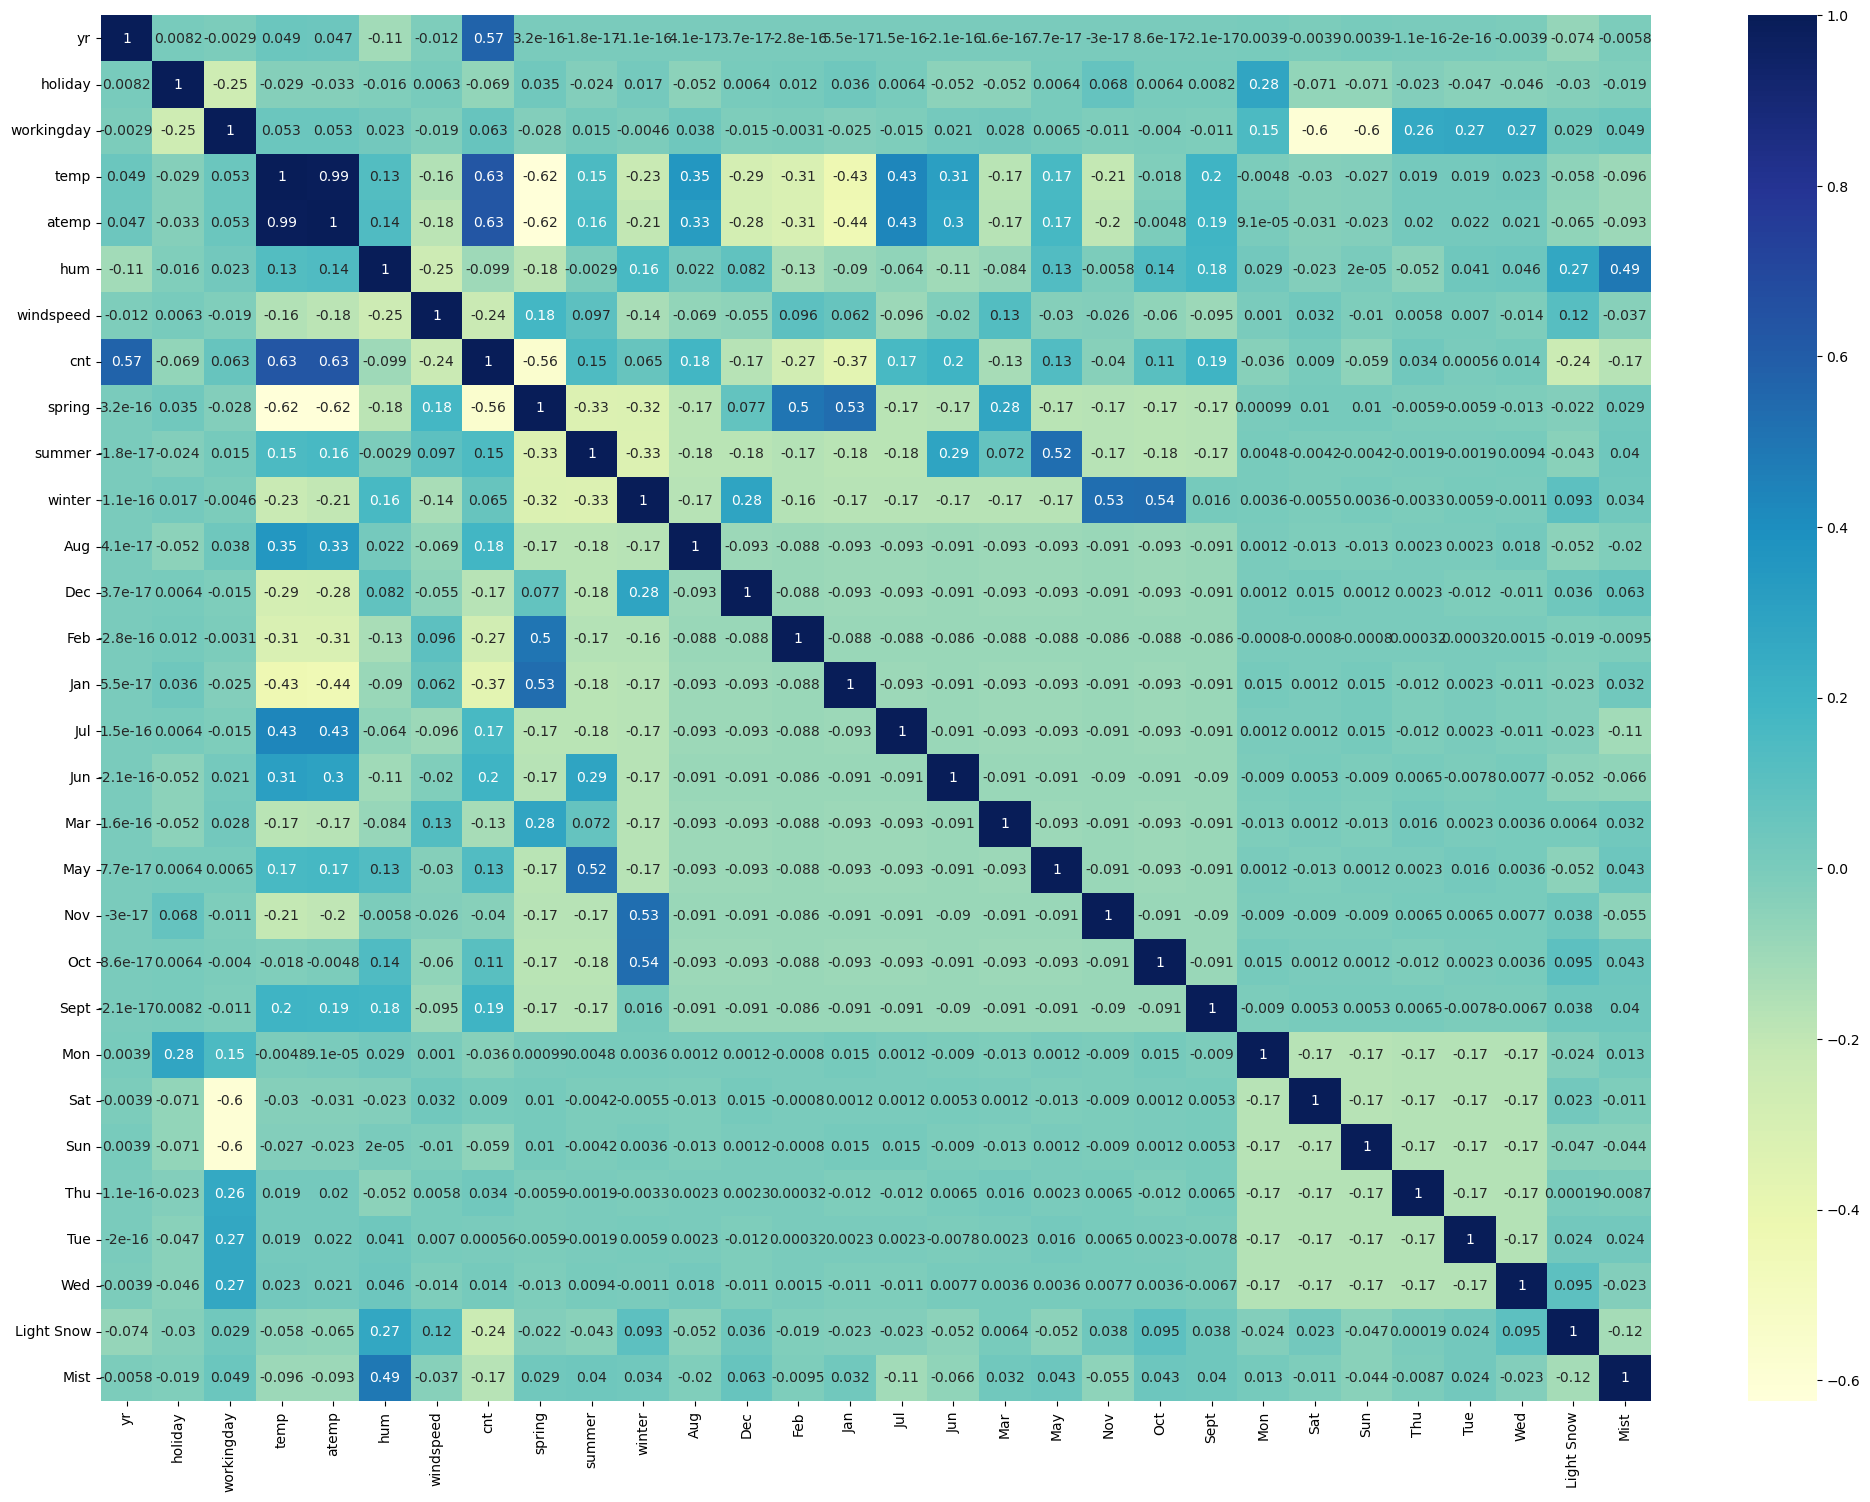

In [20]:
# Plotting heatmap of correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,18))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 3.4 - Dividing into X and Y sets for the model building

In [21]:
y_train=df_train.pop('cnt')
x_train=df_train

## Step 4 : Model Building 
<br>

### <u>__Plan</u>:__
1) We will use Recursive feature elimination from sklearn library to derive our top n feature.
2) Once we have top n feature, we will use statsmodel library to manually eliminate features based on p value and VIF score.

### __Using RFE to derive top 15 feature__

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(x_train, y_train)

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 8),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist', False, 6)]

In [23]:
# Getting all the columns name that RFE supports
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Jul', 'Nov', 'Sept', 'Sat', 'Sun', 'Light Snow'],
      dtype='object')

In [24]:
# Columns that RFE soes not supports
x_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'Mist'],
      dtype='object')

In [25]:
# Storing the training data of top 15 columns in X_train_rfe
X_train_rfe = x_train[col]

### Building Model 1 (Using Statsmodel)

In [26]:
# Adding a constant variable 
X_train_m1 = sm.add_constant(X_train_rfe)

#Fitting the model-1
lm_1 = sm.OLS(y_train,X_train_m1).fit()

#Summary of our linear model-1
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          4.51e-174
Time:                        22:27:51   Log-Likelihood:                 493.17
No. Observations:                 510   AIC:                            -956.3
Df Residuals:                     495   BIC:                            -892.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2472      0.023     10.782      0.0

In [27]:
# Calculate the VIFs for the model-1
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif



,Features,VIF
4,atemp,182.64
3,temp,182.15
2,workingday,31.69
12,Sat,7.47
13,Sun,7.25
7,spring,2.67
1,holiday,2.33
8,winter,2.09
10,Nov,1.51
5,hum,1.36


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)


_In model -1, __temp__ is having high p-value and relatively high VIF , hence we will remove __temp__ from our model_

### Building Model 2 (Using Statsmodel)

In [28]:

X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

In [29]:
# Adding a constant variable
X_train_m2 = sm.add_constant(X_train_rfe)

#Fitting the model-2 
lm_2 = sm.OLS(y_train, X_train_m2).fit()

#Summary of our linear model-2
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          6.02e-175
Time:                        22:27:51   Log-Likelihood:                 492.56
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     496   BIC:                            -897.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2527      0.022     11.294      0.0

In [30]:
# Calculate the VIFs for the model-2
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,29.96
11,Sat,7.10
12,Sun,6.87
3,atemp,3.02
6,spring,2.67
1,holiday,2.29
7,winter,2.04
9,Nov,1.51
4,hum,1.34
8,Jul,1.30


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)


_In model -2, __holiday__ is having high p-value and low VIF , hence we will remove __holiday__ from our model_

### Building Model 3 (Using Statsmodel)

In [31]:
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [32]:
# Adding a constant variable 
X_train_m3 = sm.add_constant(X_train_rfe)

#Fitting the model-3
lm_3 = sm.OLS(y_train, X_train_m3).fit()

#Summary of our linear model-3
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          6.02e-175
Time:                        22:27:52   Log-Likelihood:                 492.56
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     496   BIC:                            -897.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.036      7.682      0.0

In [33]:
# Calculate the VIFs for the model-3
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.97
2,atemp,12.87
3,hum,9.32
4,windspeed,4.76
10,Sat,3.72
11,Sun,3.63
5,spring,2.59
6,winter,2.44
0,yr,2.08
8,Nov,1.58


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)

_In model -3, __Sun__ is having high p-value and low VIF , hence we will remove __Sun__ from our model_

### Building Model 4 (Using Statsmodel)

In [34]:
X_train_rfe=X_train_rfe.drop(['Sun'],axis=1)

In [35]:
# Adding a constant variable 
X_train_m4 = sm.add_constant(X_train_rfe)

#Fitting the model-4
lm_4 = sm.OLS(y_train, X_train_m4).fit()

#Summary of our linear model-4
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          7.50e-176
Time:                        22:27:52   Log-Likelihood:                 491.99
No. Observations:                 510   AIC:                            -958.0
Df Residuals:                     497   BIC:                            -902.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3034      0.029     10.439      0.0

In [36]:
# Calculate the VIFs for the model-4
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,10.21
3,hum,8.39
1,workingday,4.63
4,windspeed,4.15
6,winter,2.27
5,spring,2.14
0,yr,2.06
10,Sat,1.76
8,Nov,1.58
7,Jul,1.40


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)

_In model -4, __hum__ is having low p-value and high VIF , hence we will remove __hum__ from our model_. The reason we are not removing ___atemp___ is because it seems to be an important variable and relates to ___cnt___ more than the ___hum___ as per the pairplot that we saw earlier

### Building Model 5 (Using Statsmodel)

In [37]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [38]:
# Adding a constant variable 
X_train_m5 = sm.add_constant(X_train_rfe)

#Fitting the model-4
lm_5 = sm.OLS(y_train, X_train_m5).fit()

#Summary of our linear model-4
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          1.82e-162
Time:                        22:27:52   Log-Likelihood:                 457.53
No. Observations:                 510   AIC:                            -891.1
Df Residuals:                     498   BIC:                            -840.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1888      0.027      6.864      0.0

In [39]:
# Calculate the VIFs for the model-4
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
1,workingday,4.54
3,windspeed,4.15
0,yr,2.05
5,winter,1.94
4,spring,1.84
9,Sat,1.73
7,Nov,1.58
6,Jul,1.36
8,Sept,1.19


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)

_In model -5, __Nov__ is having high p-value and low VIF , hence we will remove __Nov__ from our model_

###  Building Model 6 (Using Statsmodel)

In [40]:
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [41]:
# Adding a constant variable 
X_train_m6 = sm.add_constant(X_train_rfe)

#Fitting the model-4
lm_6 = sm.OLS(y_train, X_train_m6).fit()

#Summary of our linear model-4
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          2.93e-163
Time:                        22:27:52   Log-Likelihood:                 456.68
No. Observations:                 510   AIC:                            -891.4
Df Residuals:                     499   BIC:                            -844.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1842      0.027      6.750      0.0

In [42]:
# Calculate the VIFs for the model-4
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.15
1,workingday,4.53
3,windspeed,4.10
0,yr,2.04
4,spring,1.82
8,Sat,1.72
5,winter,1.43
6,Jul,1.36
7,Sept,1.18
9,Light Snow,1.08


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)

_In model -6, __workingday__ is having low p-value and high VIF , hence we will remove __workingday__ from our model_. The reason we are not removing __atemp__ is because it seems to be an important variable and relates to __cnt__ more than the __hum__ as per the pairplot that we saw earlier. Also, when we saw box-plot distribution of __workingday__ with __cnt__ ,it remained same. Hence, we concluded to drop __workingday__ ahead of __atemp__ 

###  Building Model 7 (Using Statsmodel)

In [43]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [44]:
# Adding a constant variable 
X_train_m7 = sm.add_constant(X_train_rfe)

#Fitting the model-4
lm_7 = sm.OLS(y_train, X_train_m7).fit()

#Summary of our linear model-4
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          8.93e-163
Time:                        22:27:52   Log-Likelihood:                 452.76
No. Observations:                 510   AIC:                            -885.5
Df Residuals:                     500   BIC:                            -843.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2126      0.025      8.344      0.0

In [45]:
# Calculate the VIFs for the model-4
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.28
2,windspeed,3.92
0,yr,2.03
3,spring,1.63
4,winter,1.36
5,Jul,1.34
6,Sept,1.18
7,Sat,1.17
8,Light Snow,1.07


__Measures to eliminate the variable-__

1) High p-value and high VIF 
2) High p-value and low VIF (remove first)
3) High VIF and low VIF (remove after)

_In model -5, __Sat__ is having high p-value and low VIF , hence we will remove __Sat__ from our model_

###  Building Model 8 (Using Statsmodel)

In [46]:
X_train_rfe=X_train_rfe.drop(['Sat'],axis=1)

In [47]:
# Adding a constant variable 
X_train_m8 = sm.add_constant(X_train_rfe)

#Fitting the model-4
lm_8 = sm.OLS(y_train, X_train_m8).fit()

#Summary of our linear model-4
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          8.93e-164
Time:                        22:27:52   Log-Likelihood:                 452.30
No. Observations:                 510   AIC:                            -886.6
Df Residuals:                     501   BIC:                            -848.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2148      0.025      8.469      0.0

In [48]:
# Calculate the VIFs for the model-4
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.24
2,windspeed,3.90
0,yr,2.03
3,spring,1.63
4,winter,1.35
5,Jul,1.34
6,Sept,1.18
7,Light Snow,1.07


In [49]:
# Displaying coefficient values of all predictors
lm_8.params

const         0.214827
yr            0.226318
atemp         0.475352
windspeed    -0.081034
spring       -0.110818
winter        0.032230
Jul          -0.065005
Sept          0.042341
Light Snow   -0.230065
dtype: float64

### The model- 8, looks good, because:

- As all the predictors are significant i.e have p-value less than 5% 
- VIF score of all predictors is less than 5 which means there is no issue of multicollinearity between the predictors
- R2 score of the model is 0.789 which means 78.9 % of variance in the data is explained by the model
- Adj. R-squared of the model is 0.785 or 78.5% which is very close to our R2 score
- F-statistics of the model is 233.9 which means model fits very well overall

### Equation of our best fitted line/hyperplane is:

####  cnt  =  0.214827   + (0.226318  * yr)  + (0.475352 *  atemp) + (-0.081034 * windspeed)  + (-0.110818 * spring) + (0.032230 * winter) + (-0.065005 * Jul)  + (0.042341 * Sept) + (-0.230065 * Light Snow)

# Residual Analysis

Residual analysis is done to validate assumptions of the model, and hence the reliability for inference

### Assumption 1 :  Distribution of the error terms is normal
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [50]:
#Predecting y_train values with the model that we built
y_train_price = lm_8.predict(X_train_m8)

Text(0.5, 0, 'Residuals')

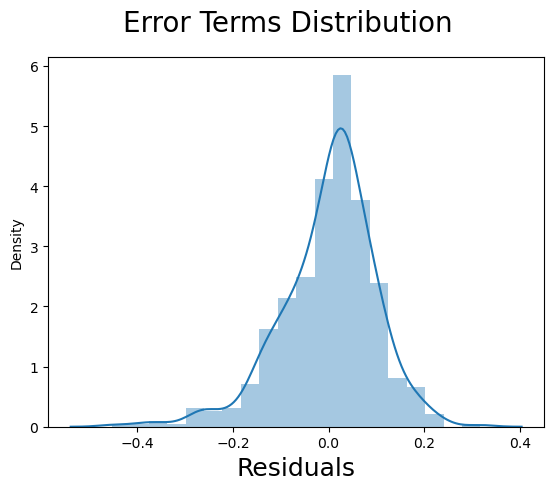

In [51]:
# Plotting residuals distribution
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)  

__As we can see that the residuals are normally distributed with mean 0. Hence, it validates the assumptions of a linear regression__

### Assumption 2 : Error terms are independent of each other

Text(0, 0.5, 'Residuals')

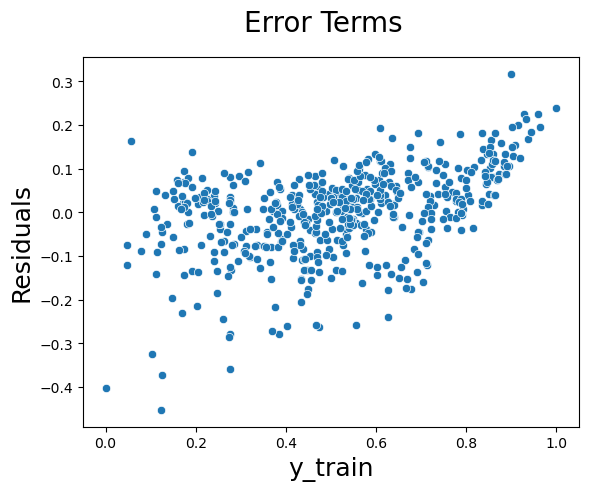

In [52]:
#Plotting residuals with actaul values of target variable i.e y_train
fig = plt.figure()
sns.scatterplot(data=bike, x=y_train, y=(y_train - y_train_price))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train', fontsize = 18)  
plt.ylabel('Residuals', fontsize = 18)  



__From the plot above we can confirm that the Error terms are independent of each other as they exhibit randomness__

Therefore both of the assumptions hold true

## Step 6 : Making Predictions Using the Final Model

### Applying the scaling on the test sets 

In [53]:
df_test[var_list] = scaler.transform(df_test[var_list])

### Dividing into X_test and y_test

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

### Predicting on test set

In [55]:
list(X_train_m8.columns)
test_list=list(X_train_m8.columns)
test_list.remove('const')
X_test_new = X_test[test_list]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions`
y_pred = lm_8.predict(X_test_new)

## Step 7 : Model Evaluation

### 7.1 Plotting y_test vs y_pred

Text(0, 0.5, 'y_pred')

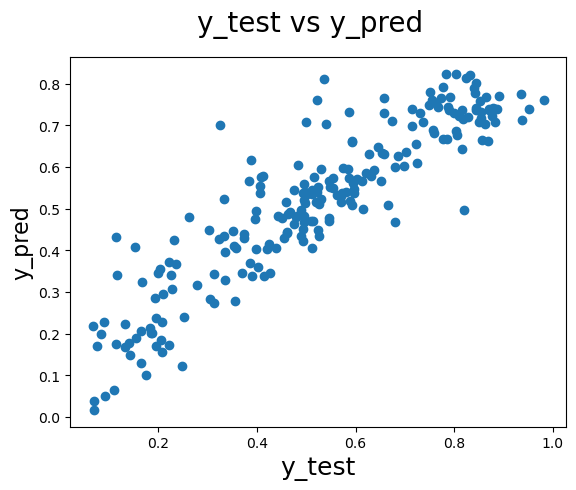

In [56]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()

plt.scatter(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)   

__The scatter plot above shows that the predicted values on the test set are highly similar to actual test values__

### 7.2 - Calculation R2 score   

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8063156879663731

### 7.2 - Calculation Adjusted R2 score

In [58]:
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7767533456033459

__The R2 and Adj.R2 score on the test set is very similar to that of the train set__

## Comparison of Training set vs Testing test

### _Train R2 - 0.789 Train Adjusted R2 - 0.785_

### _Test R2 - 0.806 Test Adjusted R2 - 0.776_

<br>

__With R2 and Adjusted R2 score on test set very similar to the training set , this model looks good and can be genralized well__

<br>
<br>

# Conclusion

### Top 3 predictor variables are : 
    
- __atemp__ - Coefficient of atemp indicates that the unit increase in the atemp , increases the bike hiring by 0.475352  
- __Light Snow (weathersit)__- Coefficient of Light Snow weather situation indicates that the unit increase in the Light Snow weather situation , decreases the bike hiring by -0.230065.
- __yr__ - Coefficient of yr indicates that the unit increase in the yr , increases the bike hiring by 0.226318  

### Other signficant predictors variables are : 

___Variables(Coefficent)___
- windspeed    (-0.081034)
- spring       (-0.110818)
- winter       ( 0.032230)
- Jul          (-0.065005)
- Sept         ( 0.042341)

             

 
